<a href="https://colab.research.google.com/github/juancastillo2001/Probability-and-Statistics/blob/master/Data_Augmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.

**About Keras:** This program allows us to generate different models for deep learning on different platforms, whether in web pages, Windows, java virtual machines, smartphone can be used for the program to obtain a solution to a certain problem, another utility that this tool has is exporting. graphics of external programs.


At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

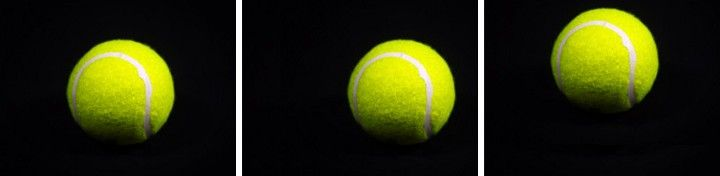



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

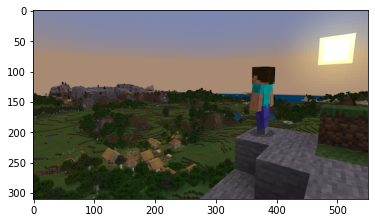

In [ ]:
url = 'https://lh3.googleusercontent.com/a3rp2n3aasgLdv7Xk3GXhMu6WoKZuase5UhTBfC7bAlsQom3vJBtaSW0xl7VMOaeDxkJ=w720-h310-rw' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


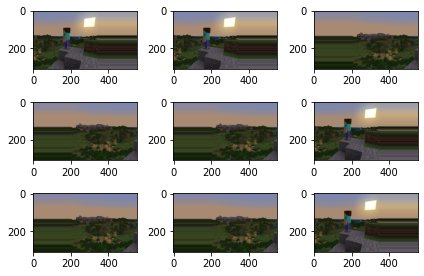

In [ ]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Un giro de imagen significa invertir las filas o columnas de píxeles en el caso de un giro vertical u horizontal, respectivamente.
El aumento se especifica mediante un argumento booleano **horizontal_flip** o **vertical_flip** para la clase **ImageDataGenerator**.

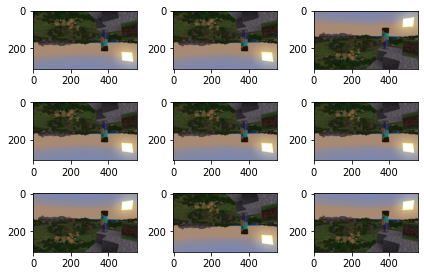

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

La cantidad de zoom se muestrea uniformemente al azar de la región de zoom para cada dimensión (ancho, alto) por separado.

Flotante o [limite inferior, limite superior]. Rango para zoom aleatorio. Si es un flotante, [limite inferior, limite superior] = [1-zoom_range, 1 + zoom_range]

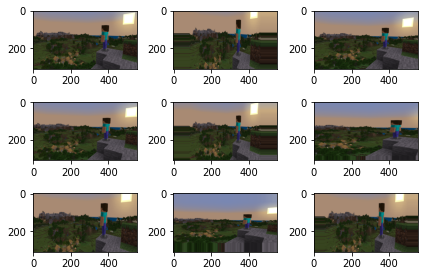

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

we flip the image in the sents of the  
clockwise a

1.   The element of a list
2.   The element of a list

a determinate of a deagreas 0 to 360. Its probably that rotate the píxels outside the picture frame and leave frame areas without pixel datas, than need to fill.

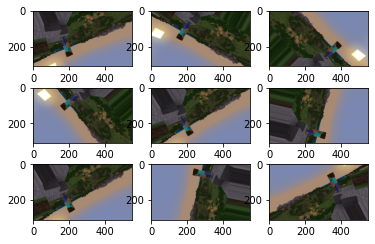

In [ ]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

the combination of this techniques that allows us to increase the amount of data in the dataset to use, in many jobs a data augmentation is used to increase the amount of tzraining images and make it better the precision of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

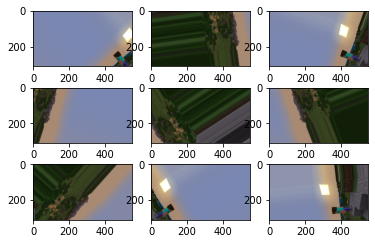

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

now that we considerate the words, the work neccesary for the job isn't simple because the complex of the leanguaje, (we can`t change every word whit his synonyms  or  even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It's a  framework of  Python for adversary attacks, adversary training and data augmentation in NLP. We will focus only on data augmentation.


In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 235kB 8.3MB/s 
     |████████████████████████████████| 153kB 11.2MB/s 
     |████████████████████████████████| 102kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 686kB 10.5MB/s 
     |████████████████████████████████| 1.1MB 20.5MB/s 
     |████████████████████████████████| 317kB 19.2MB/s 
     |████████████████████████████████| 1.7MB 21.9MB/s 
     |████████████████████████████████| 245kB 32.7MB/s 
     |████████████████████████████████| 3.0MB 34.2MB/s 
     |████████████████████████████████| 778kB 34.3MB/s 
     |████████████████████████████████| 245kB 39.5MB/s 
     |████████████████████████████████| 17.3MB 234kB/s 
     |████████████████████████████████| 204kB 41.9MB/s 
     |████████████████████████████████| 1.1MB 38.9MB/s 
     |████████████████████████████████| 890kB 40.4MB/s 

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-15 07:35:39 INFO: Downloading default packages for language: en (English)...
2020-10-15 07:37:25 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Hearing voices no one else can hear isn’t a good sign, even in the wizarding world."

TextAttack give'us the four different  métodos methods for data augmentation.


## WordNetAugmenter

Augment the text by replacing it with synonyms from the thesaurus (Dictionary of Synonyms) of the WordNet.

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs thats agoup in different in sets of cognitive synonyms (synsets), one by one express another different concep.
WordNet are similar like tesauro,because agroups a funtion of they meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['try voices no one else can hear isn’t a good sign, even in the wizarding world.']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:34<00:00, 13.8MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpbwlqqmv8.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Hearing voices no one other can hear isn’t a good sign, even in the wizarding world.']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Hearing voices no one else can ear isn’t a good sign, even in the wizarding world.']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['see voices no one else can hear isn’t a good sign, even in the wizarding world.',
 'Hearing voices no one else can hear isn’t a good universe sign, even in the wizarding world.',
 'Hearing a no one else can hear isn’t voices good sign, even in the wizarding world.',
 'Hearing voices no one else can hear isn’t a good sign, even the wizarding world.']

Googletrans  use an API Ajax of Google Translate for the detection and traducction of the Languages.

The key parameters for the method **translate ()** are:



1.   **src**: Languages of origen. this parameter it is optional that  **googletrans** will detected.
2.   **dest**: Languages of destiny. obligatory parameter.

1.   **text**: the text that will be translated from the source language to the target language. obligatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

LThe supported languages ​​can be consulted in:
 https://cloud.google.com/translate/docs/languages?hl=es

To obtain the better results,  It is recommended to do some tests with the languages, if the target language is very similar the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a trial and error problem
.


some expample that we can use are the next language : 


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 972kB 8.2MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=3730fe3325ff77c62b675386336b2e52390f51123b17908e37a3819796f86e0d
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=46eba432be25aa0e2c9b556a36113a2038b7cc9c68954d7a385474b118bc99a7
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "It is a far, far better thing that I do, than I have ever done; it is a far, far better rest I go to than I have ever known."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

It is a far, far better thing that I do, than I have ever done; it is a far, far better rest I go to than I have ever known.
これまでよりもはるかに優れた方法です。それは私が今までに知っていたよりもはるかに良い休息です。
It's a much better way than ever. It's a much better rest than I've ever known.


In [ ]:
origin_text = "All we have to decide is what to do with the time that is given us."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

All we have to decide is what to do with the time that is given us.
Habemus ergo statuo tibi omnes dies datus est nobis.
We therefore confirm to you all the time given to us.


In [ ]:
origin_text = "It matters not what someone is born, but what they grow to be."
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

It matters not what someone is born, but what they grow to be.
Gravas ne tio, kio iu naskiĝis, sed kia ĝi fariĝas.
What matters is not what someone is born with, but what it becomes.
